In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_All/'
# input_path2 = '/g/data/e14/erd561/access-om2/'

In [4]:
pme_river_1_mod = xr.open_dataset(input_path + 'pme_river_z0_1_mod.nc').pme_river_z0_1_mod
print(pme_river_1_mod)
pme_river_1_slope_mod = xr.open_dataset(input_path + 'pme_river_z0_1_slope_mod.nc').pme_river_z0_1_slope_mod*10
print(pme_river_1_slope_mod)
pme_river_1_p_value_mod = xr.open_dataset(input_path + 'pme_river_z0_1_p_value_mod.nc').pme_river_z0_1_p_value_mod
print(pme_river_1_p_value_mod)

pme_river_025_mod = xr.open_dataset(input_path + 'pme_river_z0_025_mod.nc').pme_river_z0_025_mod
print(pme_river_025_mod)
pme_river_025_slope_mod = xr.open_dataset(input_path + 'pme_river_z0_025_slope_mod.nc').pme_river_z0_025_slope_mod*10
print(pme_river_025_slope_mod)
pme_river_025_p_value_mod = xr.open_dataset(input_path + 'pme_river_z0_025_p_value_mod.nc').pme_river_z0_025_p_value_mod
print(pme_river_025_p_value_mod)

pme_river_01_mod = xr.open_dataset(input_path + 'pme_river_z0_01_mod.nc').pme_river_z0_01_mod
print(pme_river_01_mod)
pme_river_01_slope_mod = xr.open_dataset(input_path + 'pme_river_z0_01_slope_mod.nc').pme_river_z0_01_slope_mod*10
print(pme_river_01_slope_mod)
pme_river_01_p_value_mod = xr.open_dataset(input_path + 'pme_river_z0_01_p_value_mod.nc').pme_river_z0_01_p_value_mod
print(pme_river_01_p_value_mod)

<xarray.DataArray 'pme_river_z0_1_mod' (yt_ocean: 91, xt_ocean: 91, year: 14)>
[115934 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.07 -69.18 -68.23 ... 17.85 19.36 20.16
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 177.5 178.5 179.5 180.5
  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'pme_river_z0_1_slope_mod' (yt_ocean: 91, xt_ocean: 91)>
array([[            nan,             nan,             nan, ...,
         8.15100382e-06,  6.52922271e-06,  5.00856136e-06],
       [            nan,             nan,             nan, ...,
         4.32695185e-06,  3.51553190e-06,  2.69922540e-06],
       [            nan,             nan,             nan, ...,
         3.32874891e-06,  2.86861644e-06,  3.52704224e-06],
       ...,
       [-4.57180311e-06, -7.18998894e-06, -1.10929824e-05, ...,
         1.93767466e-07,  2.84004772e-07, -5.22055876e-07],
       [-6.16999279e-06, -1.22015787e-05, -1.6738770

In [9]:
net_sfc_heating_1_mod = xr.open_dataset(input_path + 'net_sfc_heating_1_mod.nc').net_sfc_heating_1_mod
print(net_sfc_heating_1_mod)
net_sfc_heating_1_mod_slope = xr.open_dataset(input_path + 'net_sfc_heating_1_mod_slope.nc').net_sfc_heating_1_mod_slope*10
print(net_sfc_heating_1_mod_slope)
net_sfc_heating_1_mod_p_value = xr.open_dataset(input_path + 'net_sfc_heating_1_mod_p_value.nc').net_sfc_heating_1_mod_p_value
print(net_sfc_heating_1_mod_p_value)

net_sfc_heating_025_mod = xr.open_dataset(input_path + 'net_sfc_heating_025_mod.nc').net_sfc_heating_025_mod
print(net_sfc_heating_025_mod)
net_sfc_heating_025_mod_slope = xr.open_dataset(input_path + 'net_sfc_heating_025_mod_slope.nc').net_sfc_heating_025_mod_slope*10
print(net_sfc_heating_025_mod_slope)
net_sfc_heating_025_mod_p_value = xr.open_dataset(input_path + 'net_sfc_heating_025_mod_p_value.nc').net_sfc_heating_025_mod_p_value
print(net_sfc_heating_025_mod_p_value)

net_sfc_heating_01_mod = xr.open_dataset(input_path + 'net_sfc_heating_01_mod.nc').net_sfc_heating_01_mod
print(net_sfc_heating_01_mod)
net_sfc_heating_01_mod_slope = xr.open_dataset(input_path + 'net_sfc_heating_01_mod_slope.nc').net_sfc_heating_01_mod_slope*10
print(net_sfc_heating_01_mod_slope)
net_sfc_heating_01_mod_p_value = xr.open_dataset(input_path + 'net_sfc_heating_01_mod_p_value.nc').net_sfc_heating_01_mod_p_value
print(net_sfc_heating_01_mod_p_value)

<xarray.DataArray 'net_sfc_heating_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 25)>
[360000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 2233 2234 2235 2236 2237 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'net_sfc_heating_1_mod_slope' (yt_ocean: 160, xt_ocean: 90)>
array([[        nan,         nan,         nan, ..., -0.22525858,
        -0.38392463, -0.64792004],
       [        nan,         nan,         nan, ...,  0.55148034,
         0.34730809, -0.0858383 ],
       [        nan,         nan,         nan, ...,  0.77426167,
         0.60657518,  0.2841538 ],
       ...,
       [ 1.4816355 ,  0.40856161, -0.4963543 , ..., -2.27004902,
        -1.97728904, -1.71768195],
       [ 1.08116219,  0.28250333, -0.27086998, ..., -2.96954236,
        -2.59906271, -2.19694666],
       [ 0.16655048, -0.42610154, -0.267

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.29347826086956524, y1=0.88)
[0.125, 0.7258695652173913, 0.31097826086956526, 0.89]
Bbox(x0=0.3271739130434783, y0=0.7158695652173913, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.7258695652173913, 0.5131521739130435, 0.89]
Bbox(x0=0.5293478260869566, y0=0.7158695652173913, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.7258695652173913, 0.7153260869565218, 0.89]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.29347826086956524, y1=0.6830434782608695)
[0.125, 0.5189130434782608, 0.31097826086956526, 0.6830434782608695]
Bbox(x0=0.3271739130434783, y0=0.5189130434782608, x1=0.4956521739130435, y1=0.6830434782608695)
[0.3271739130434783, 0.5189130434782608, 0.5131521739130435, 0.6830434782608695]
Bbox(x0=0.5293478260869566, y0=0.5189130434782608, x1=0.6978260869565218, y1=0.6830434782608695)
[0.5293478260869566, 0.5189130434782608, 0.7153260869565218, 0.6830434782608695]
Bbox(x0=0.125, y0=0.32195652173913036, x1=0.29347826086956524, y

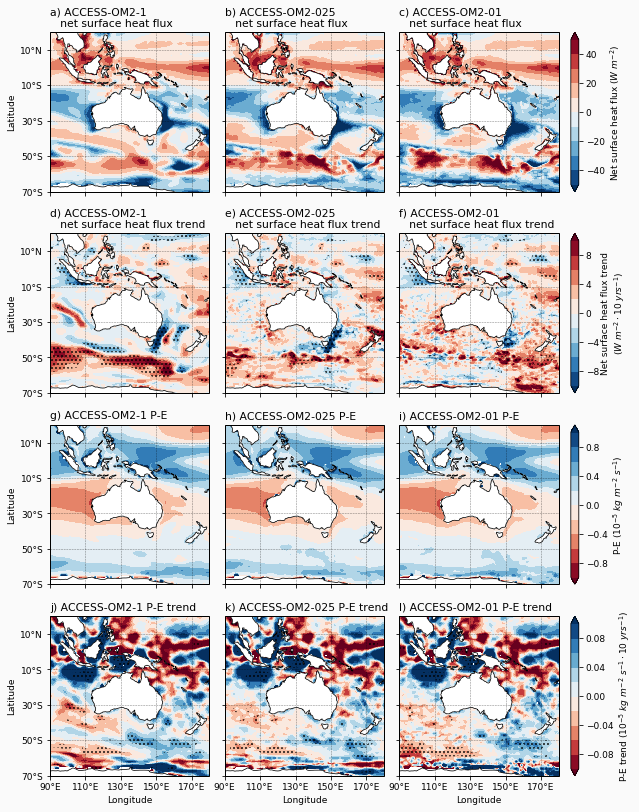

In [15]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,13.5), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

row=4
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.01] 
print(pos_plot)
levels=arange(-50,50,10)
cmap = plt.cm.RdBu_r
data = net_sfc_heating_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
# data2 = net_sfc_heating_1_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1\n   net surface heat flux', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.01] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = net_sfc_heating_025_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
# data2 = net_sfc_heating_025_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025\n   net surface heat flux', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1+0.0175, pos.y1+0.01] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = net_sfc_heating_01_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
# data2 = net_sfc_heating_01_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01\n   net surface heat flux', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label='Net surface heat flux ($W\ m^{-2}$)', cax=axins)


ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-10,10,2)
cmap = plt.cm.RdBu_r
data = net_sfc_heating_1_mod_slope
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
data2 = net_sfc_heating_1_mod_p_value
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) ACCESS-OM2-1\n   net surface heat flux trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = net_sfc_heating_025_mod_slope
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
data2 = net_sfc_heating_025_mod_p_value
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-025\n   net surface heat flux trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = net_sfc_heating_01_mod_slope
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
data2 = net_sfc_heating_01_mod_p_value
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-01\n   net surface heat flux trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label='Net surface heat flux trend\n' + r'($W\ m^{-2} \cdot 10\ yrs^{-1}$)', cax=axins)

ax = plt.subplot(row, col, 9, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu
data = pme_river_1_mod.mean('year')*10000
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
# data2 = net_sfc_heating_1_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-1 P-E', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 10, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = pme_river_025_mod.mean('year')*10000
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
# data2 = net_sfc_heating_025_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) ACCESS-OM2-025 P-E', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 11, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = pme_river_01_mod.mean('year')*10000
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
# data2 = net_sfc_heating_01_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-01 P-E', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label='P-E ($10^{-5}\ kg\ m^{-2}\ s^{-1}$)', cax=axins)


ax = plt.subplot(row, col, 13, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-0.1,0.1,0.02)
cmap = plt.cm.RdBu
data = pme_river_1_slope_mod*10000
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
data2 = pme_river_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-1 P-E trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 14, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = pme_river_025_slope_mod*10000
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
data2 = pme_river_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('k) ACCESS-OM2-025 P-E trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 15, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = pme_river_01_slope_mod*10000
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
data2 = pme_river_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('l) ACCESS-OM2-01 P-E trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'P-E trend ($10^{-5}\ kg\ m^{-2}\ s^{-1} \cdot 10\ yrs^{-1}$)', cax=axins)

savefigure('nsh_pme_9317')